## Final Project Submission

Please fill out:
* Student name: Michael Flores
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Setting up the datasets for analysis

In [2]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [3]:
pwd

'C:\\Users\\msf89\\dsc-mod-1-project-v2-1-onl01-dtsc-ft-052620'

In [5]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\imdb.title.ratings.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [6]:
type(csv_files)
d = {}

In [7]:
for file in csv_files:
    d[file] = pd.read_csv(file)

In [8]:
d.keys()

dict_keys(['./zippedData\\bom.movie_gross.csv.gz', './zippedData\\imdb.name.basics.csv.gz', './zippedData\\imdb.title.akas.csv.gz', './zippedData\\imdb.title.basics.csv.gz', './zippedData\\imdb.title.crew.csv.gz', './zippedData\\imdb.title.principals.csv.gz', './zippedData\\imdb.title.ratings.csv.gz', './zippedData\\tmdb.movies.csv.gz', './zippedData\\tn.movie_budgets.csv.gz'])

In [9]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [10]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [11]:
csv_files_dict['imdb_title_crew_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [12]:
bom_movie_gross_df = csv_files_dict['bom_movie_gross_gz']
imdb_name_basics_df = csv_files_dict['imdb_name_basics_gz']
imdb_title_akas_df = csv_files_dict['imdb_title_akas_gz']
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']
imdb_title_crew_df = csv_files_dict['imdb_title_crew_gz']
imdb_title_principals_df = csv_files_dict['imdb_title_principals_gz']
imdb_title_ratings_df = csv_files_dict['imdb_title_ratings_gz']
tmdb_movies_df = csv_files_dict['tmdb_movies_gz']
tn_movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']


In [13]:
tmdb_movies_df.head(50)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [22]:
movie_budget_practice = tn_movie_budgets_df
movie_budget_practice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [15]:
def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int64')
    return df

In [21]:
money_cols = ['production_budget','domestic_gross']

for col in money_cols:
    movie_budget_practice = convert_amt_to_int(movie_budget_practice, col)

AttributeError: Can only use .str accessor with string values!

In [17]:
movie_budget_practice.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1045663875
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",149762350
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747


In [25]:
movie_budget_practice['total_gross'] = movie_budget_practice['domestic_gross'] + movie_budget_practice['worldwide_gross']
movie_budget_practice.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129


In [26]:
movie_budget_practice['net_profit'] = movie_budget_practice['total_gross'] - movie_budget_practice['production_budget']
movie_budget_practice.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [27]:
movie_budget_practice['profit_margin'] = round(((movie_budget_practice['net_profit'] / 
                                                movie_budget_practice['production_budget']) * 100),2)
movie_budget_practice.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit,profit_margin
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.20
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.38
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.99
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.22
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,511.01


In [28]:
movie_budget_practice = movie_budget_practice.rename(columns={'profit_margin':'profit_percentage'})
movie_budget_practice.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit,profit_percentage
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.20
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.38
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.99
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.22
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,511.01


In [29]:
movie_budget_practice_2 = movie_budget_practice
movie_budget_practice_2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit,profit_percentage
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.20
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.38
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.99
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.22
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,511.01


In [32]:
movie_details_df = pd.merge(movie_budget_practice_2, imdb_title_basics_df, left_on =  ['movie'],
                   right_on= ['primary_title'], 
                   how = 'left')
movie_details_df.head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit,profit_percentage,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.20,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.38,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.99,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.22,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,511.01,NaN,NaN,NaN,NaN,NaN
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445,877.12,NaN,NaN,NaN,NaN,NaN
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.98,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
7,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,1272840850,972840850,324.28,NaN,NaN,NaN,NaN,NaN
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,884969504,584969504,194.99,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,1079695098,779695098,259.90,Spectre,Spectre,2015.0,148.0,"Action,Adventure,Thriller"


# Cleaning up the datasets

## Initial cleaning and analysis

In [33]:
movie_details_df.dropna(inplace = True)

In [105]:
movie_details_df.columns

Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'total_gross', 'net_profit',
       'profit_percentage', 'profit_margin'],
      dtype='object')

In [34]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 7219
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3309 non-null   object 
 1   movie              3309 non-null   object 
 2   production_budget  3309 non-null   int64  
 3   domestic_gross     3309 non-null   int64  
 4   worldwide_gross    3309 non-null   int64  
 5   total_gross        3309 non-null   int64  
 6   net_profit         3309 non-null   int64  
 7   profit_percentage  3309 non-null   float64
 8   primary_title      3309 non-null   object 
 9   original_title     3309 non-null   object 
 10  start_year         3309 non-null   float64
 11  runtime_minutes    3309 non-null   float64
 12  genres             3309 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 361.9+ KB


In [108]:

movie_details_df.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 20 to 146287
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      3309 non-null   object 
 1   original_title     3309 non-null   object 
 2   start_year         3309 non-null   int64  
 3   runtime_minutes    3309 non-null   float64
 4   genres             3309 non-null   object 
 5   release_date       3309 non-null   object 
 6   movie              3309 non-null   object 
 7   production_budget  3309 non-null   float64
 8   domestic_gross     3309 non-null   float64
 9   worldwide_gross    3309 non-null   float64
 10  total_gross        3309 non-null   float64
 11  net_profit         3309 non-null   float64
 12  profit_percentage  3309 non-null   float64
 13  profit_margin      3309 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 387.8+ KB


In [41]:
movie_details_df.head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit,profit_percentage,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.20,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.38,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.99,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.22,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.98,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,884969504,584969504,194.99,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,1079695098,779695098,259.90,Spectre,Spectre,2015.0,148.0,"Action,Adventure,Thriller"
10,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,1532578198,1257578198,457.30,The Dark Knight Rises,The Dark Knight Rises,2012.0,164.0,"Action,Thriller"
11,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,606918859,331918859,120.70,Solo: A Star Wars Story,Solo: A Star Wars Story,2018.0,135.0,"Action,Adventure,Fantasy"
12,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,349304230,74304230,27.02,The Lone Ranger,The Lone Ranger,2013.0,150.0,"Action,Adventure,Western"


## Checking for and removing duplicates

In [42]:
#Example case: Robin Hood is repeated multiple times in the data set
df = movie_details_df.loc[movie_details_df['primary_title'].
                          str.contains('Robin Hood')]
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit,profit_percentage,primary_title,original_title,start_year,runtime_minutes,genres
38,"May 14, 2010",Robin Hood,210000000,105487148,322459006,427946154,217946154,103.78,Robin Hood,Robin Hood,2010.0,140.0,"Action,Adventure,Drama"
39,"May 14, 2010",Robin Hood,210000000,105487148,322459006,427946154,217946154,103.78,Robin Hood,Robin Hood,2013.0,92.0,"Action,Drama"
40,"May 14, 2010",Robin Hood,210000000,105487148,322459006,427946154,217946154,103.78,Robin Hood,Robin Hood,2018.0,116.0,"Action,Adventure,Thriller"
42,"May 14, 2010",Robin Hood,210000000,105487148,322459006,427946154,217946154,103.78,Robin Hood,Robin Hood,2017.0,60.0,"Action,Adventure,History"
483,"Nov 21, 2018",Robin Hood,99000000,30824628,84747441,115572069,16572069,16.74,Robin Hood,Robin Hood,2010.0,140.0,"Action,Adventure,Drama"
484,"Nov 21, 2018",Robin Hood,99000000,30824628,84747441,115572069,16572069,16.74,Robin Hood,Robin Hood,2013.0,92.0,"Action,Drama"
485,"Nov 21, 2018",Robin Hood,99000000,30824628,84747441,115572069,16572069,16.74,Robin Hood,Robin Hood,2018.0,116.0,"Action,Adventure,Thriller"
487,"Nov 21, 2018",Robin Hood,99000000,30824628,84747441,115572069,16572069,16.74,Robin Hood,Robin Hood,2017.0,60.0,"Action,Adventure,History"


In [43]:
#Dropping duplicates based on matching primary title and release date
movie_details_df2 = movie_details_df

movie_details_df2 = movie_details_df2.drop_duplicates(subset=['primary_title',
                                                              'release_date',],
                                                      keep="first",
                                                      inplace=False)

In [45]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2264 entries, 0 to 7219
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2264 non-null   object 
 1   movie              2264 non-null   object 
 2   production_budget  2264 non-null   int64  
 3   domestic_gross     2264 non-null   int64  
 4   worldwide_gross    2264 non-null   int64  
 5   total_gross        2264 non-null   int64  
 6   net_profit         2264 non-null   int64  
 7   profit_percentage  2264 non-null   float64
 8   primary_title      2264 non-null   object 
 9   original_title     2264 non-null   object 
 10  start_year         2264 non-null   float64
 11  runtime_minutes    2264 non-null   float64
 12  genres             2264 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 247.6+ KB


In [46]:
df2 = movie_details_df2.loc[movie_details_df2['primary_title']
                            .str.contains('Robin Hood')]
df2

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit,profit_percentage,primary_title,original_title,start_year,runtime_minutes,genres
38,"May 14, 2010",Robin Hood,210000000,105487148,322459006,427946154,217946154,103.78,Robin Hood,Robin Hood,2010.0,140.0,"Action,Adventure,Drama"
483,"Nov 21, 2018",Robin Hood,99000000,30824628,84747441,115572069,16572069,16.74,Robin Hood,Robin Hood,2010.0,140.0,"Action,Adventure,Drama"


## Splitting into genres

In [47]:
movie_details_df2['genres'] = movie_details_df2['genres'].apply(lambda x: x.split(",") if x else x)
movie_details_df2.head()

C:\Users\msf89\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit,profit_percentage,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.20,Avatar,Abatâ,2011.0,93.0,[Horror]
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.38,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.99,Dark Phoenix,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.22,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.98,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"


In [48]:
all_genres = set()
for genres in movie_details_df['genres']:
    if genres:
        all_genres.update(genres)

In [49]:
for genre in all_genres:
    movie_details_df2[genre] = np.zeros(shape=movie_details_df2.shape[0])
                                
movie_details_df2.head(15)

C:\Users\msf89\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit,profit_percentage,primary_title,original_title,...,n,M,C,D,H,a,o,g,w,i
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.20,Avatar,Abatâ,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.38,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.99,Dark Phoenix,Dark Phoenix,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.22,Avengers: Age of Ultron,Avengers: Age of Ultron,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.98,Avengers: Infinity War,Avengers: Infinity War,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,884969504,584969504,194.99,Justice League,Justice League,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,1079695098,779695098,259.90,Spectre,Spectre,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,1532578198,1257578198,457.30,The Dark Knight Rises,The Dark Knight Rises,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,606918859,331918859,120.70,Solo: A Star Wars Story,Solo: A Star Wars Story,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,349304230,74304230,27.02,The Lone Ranger,The Lone Ranger,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#setting the genre to be 1 if the film is of that genre

for index, row in movie_details_df2.iterrows():
    if row['genres']:
        for genre in row['genres']:
            movie_details_df2.loc[index, genre] = 1

movie_details_df2.head(15)

C:\Users\msf89\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\msf89\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit,profit_percentage,primary_title,original_title,...,Romance,Mystery,History,Sport,Biography,Documentary,War,Musical,Music,News
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.20,Avatar,Abatâ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.38,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.99,Dark Phoenix,Dark Phoenix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.22,Avengers: Age of Ultron,Avengers: Age of Ultron,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.98,Avengers: Infinity War,Avengers: Infinity War,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,884969504,584969504,194.99,Justice League,Justice League,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,1079695098,779695098,259.90,Spectre,Spectre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,1532578198,1257578198,457.30,The Dark Knight Rises,The Dark Knight Rises,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,606918859,331918859,120.70,Solo: A Star Wars Story,Solo: A Star Wars Story,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,349304230,74304230,27.02,The Lone Ranger,The Lone Ranger,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
movie_details_df_modified = movie_details_df2.drop(columns = {'c',
       'm', 'e', 'N', 'B', 'y', 'l', 'd', '-', 's', 'p', 'W', 'r', 'F', 'R',
       'T', 't', 'V', 'S', 'h', 'v', ',', 'u', 'A', 'n', 'M', 'C', 'D', 'H',
       'a', 'o', 'g', 'w', 'i','start_year'})
movie_details_df_modified.columns


Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'total_gross', 'net_profit', 'profit_percentage',
       'primary_title', 'original_title', 'runtime_minutes', 'genres',
       'Horror', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller',
       'Western', 'Animation', 'Comedy', 'Family', 'Crime', 'Drama', 'Romance',
       'Mystery', 'History', 'Sport', 'Biography', 'Documentary', 'War',
       'Musical', 'Music', 'News'],
      dtype='object')

In [63]:
for col in movie_details_df_modified:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_details_df_modified[col].value_counts()}')
    


Viewing values in col: release_date
Top 5 values:
Dec 31, 2014    17
Dec 31, 2015    11
Dec 31, 2013    11
Oct 17, 2014     8
Dec 31, 2012     8
                ..
Nov 9, 1988      1
Sep 29, 2006     1
Apr 21, 2006     1
Mar 5, 2010      1
Jun 13, 1967     1
Name: release_date, Length: 1085, dtype: int64
Viewing values in col: movie
Top 5 values:
Halloween             3
Home                  3
The Island            2
Serenity              2
The Karate Kid        2
                     ..
Midway                1
Boomerang             1
The Interpreter       1
Nerve                 1
Dallas Buyers Club    1
Name: movie, Length: 2203, dtype: int64
Viewing values in col: production_budget
Top 5 values:
20000000     92
10000000     90
30000000     67
5000000      65
15000000     64
             ..
106000000     1
217000000     1
9300000       1
170000        1
12800000      1
Name: production_budget, Length: 329, dtype: int64
Viewing values in col: domestic_gross
Top 5 values:
0           3

## Removing rows with values we are not interested in

In [73]:
# Evaluating the value counts for the columns above reveals rows in which there 
# is no information for budget and total gross

# Not removing movies with only no domestic gross or only no foreign gross 
# due to potential of foreign film release or movies without foreign release

movie_details_df_modified2 = movie_details_df_modified

In [74]:
# Determining which indices contain no information for production budget 
# or movie details for removal
indexBudget = movie_details_df_modified2[(movie_details_df_modified2
                                          ['production_budget'] == 0)].index
indexGross = movie_details_df_modified2[(movie_details_df_modified2
                                         ['total_gross'] == 0)].index
indexBudget

Int64Index([], dtype='int64')

In [75]:
movie_details_df_modified2.drop(indexBudget, inplace=True)
movie_details_df_modified2.drop(indexGross, inplace=True)

for col in movie_details_df_modified2:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_details_df_modified2[col].value_counts()}')

Viewing values in col: release_date
Top 5 values:
Oct 8, 2010     8
Oct 10, 2014    8
Oct 17, 2014    8
Oct 23, 2015    7
Apr 1, 2011     7
               ..
Feb 23, 1951    1
Dec 21, 1937    1
Dec 1, 2000     1
Aug 30, 2013    1
Jun 13, 1967    1
Name: release_date, Length: 1012, dtype: int64
Viewing values in col: movie
Top 5 values:
Halloween               3
Carrie                  2
Clash of the Titans     2
Beauty and the Beast    2
The Signal              2
                       ..
Nerve                   1
Remember Me             1
Furious 7               1
Blair Witch             1
Dallas Buyers Club      1
Name: movie, Length: 2000, dtype: int64
Viewing values in col: production_budget
Top 5 values:
20000000     90
10000000     86
30000000     67
15000000     63
25000000     62
             ..
325000        1
230000000     1
66000000      1
4700000       1
12800000      1
Name: production_budget, Length: 310, dtype: int64
Viewing values in col: domestic_gross
Top 5 values:
0 

In [76]:
movie_details_df_modified2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 7211
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2054 non-null   object 
 1   movie              2054 non-null   object 
 2   production_budget  2054 non-null   int64  
 3   domestic_gross     2054 non-null   int64  
 4   worldwide_gross    2054 non-null   int64  
 5   total_gross        2054 non-null   int64  
 6   net_profit         2054 non-null   int64  
 7   profit_percentage  2054 non-null   float64
 8   primary_title      2054 non-null   object 
 9   original_title     2054 non-null   object 
 10  runtime_minutes    2054 non-null   float64
 11  genres             2054 non-null   object 
 12  Horror             230 non-null    float64
 13  Action             504 non-null    float64
 14  Adventure          399 non-null    float64
 15  Fantasy            145 non-null    float64
 16  Sci-Fi             157 n

## Visualizing number of movies with each genre

In [78]:
cols = list(movie_details_df_modified2.columns)
cols

['release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'total_gross',
 'net_profit',
 'profit_percentage',
 'primary_title',
 'original_title',
 'runtime_minutes',
 'genres',
 'Horror',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Western',
 'Animation',
 'Comedy',
 'Family',
 'Crime',
 'Drama',
 'Romance',
 'Mystery',
 'History',
 'Sport',
 'Biography',
 'Documentary',
 'War',
 'Musical',
 'Music',
 'News']

In [81]:
genre_cols = cols[12:]
#getting a dict with genre counts

genre_count = {}
for col in genre_cols:
    count = np.sum(movie_details_df_modified2[col] == 1).sum() 
    genre_count[col] = count
genre_count

{'Horror': 230,
 'Action': 504,
 'Adventure': 399,
 'Fantasy': 145,
 'Sci-Fi': 157,
 'Thriller': 330,
 'Western': 11,
 'Animation': 116,
 'Comedy': 605,
 'Family': 122,
 'Crime': 282,
 'Drama': 1032,
 'Romance': 254,
 'Mystery': 158,
 'History': 64,
 'Sport': 44,
 'Biography': 173,
 'Documentary': 169,
 'War': 31,
 'Musical': 12,
 'Music': 62,
 'News': 1}

In [84]:
keys = list(genre_count.keys())
values = list(genre_count.values())

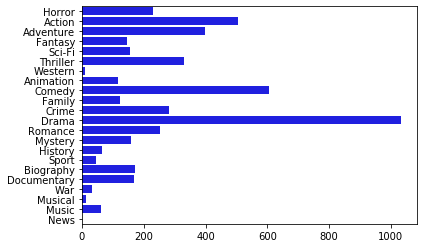

In [85]:
sns.barplot(y = keys, x = values, color = 'blue')

In [139]:
genre_median = {}
for col in genre_cols:
    df_practice = movie_details_df_modified2.loc[movie_details_df_modified2[col] == 1.0] 
    genre_median[col] = round(df_practice['profit_percentage'].median(),2)

genre_df = pd.DataFrame(list(genre_median.items()), columns = ['Genres','Median Profit Margin'])
genre_df = genre_df.sort_values('Median Profit Margin', ascending=False)
top10 = genre_df.head(10)
top10

,Genres,Median Profit Margin
21,News,345.51
13,Mystery,309.12
0,Horror,293.68
7,Animation,291.50
4,Sci-Fi,265.69
2,Adventure,261.18
20,Music,251.82
8,Comedy,241.13
9,Family,240.10
12,Romance,221.38


# Data Visualization Setup

Text(0.5, 1.0, 'Median Profit Margin by Genre')

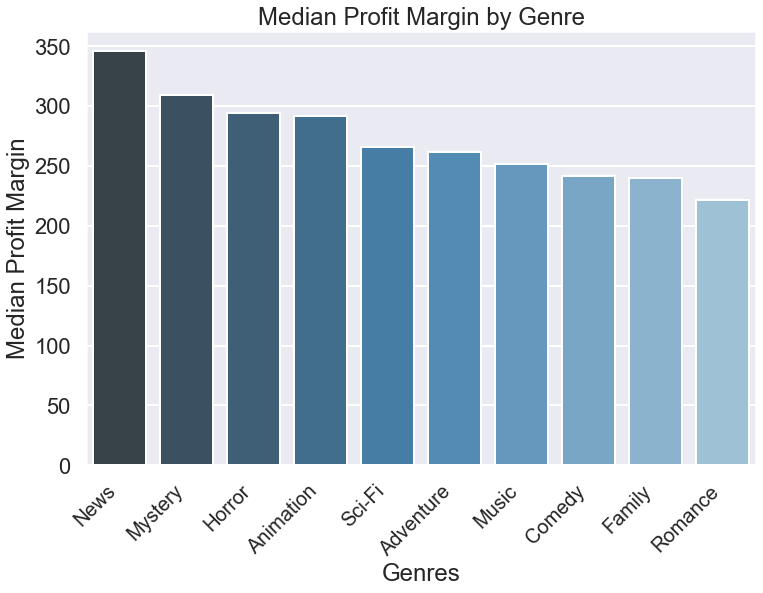

In [160]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
graph = sns.barplot(x='Genres', y="Median Profit Margin", data=top10, 
                    palette="Blues_d")
sns.set_context("poster")

graph.set_xticklabels(graph.get_xticklabels(), rotation=45 ,
                      fontweight='light',fontsize='small',
                      horizontalalignment='right')

graph.set_title('Median Profit Margin by Genre')